In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils import to_categorical
import time
import math
import numpy as np

df = pd.read_csv("data.csv")
features = df[[a for a in df.columns if "y" in a]]
labels = df.loc[:, "spacegroup_number"]
labelMap =labels.drop_duplicates().reset_index(drop=True)
for ind in labelMap.index: 
    labels = labels.replace(labelMap.loc[ind], ind)
    
encoder = LabelEncoder()
encodedLabels = encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    encodedLabels,
                                                    test_size=0.2,
                                                    random_state=42)

In [33]:
from sklearn.ensemble import RandomForestRegressor
mod = RandomForestRegressor(n_estimators=200, 
                            random_state = 0, 
                            max_features  = 180,
                            verbose = 2,
                            n_jobs=16)

In [34]:
from sklearn.model_selection import cross_val_score
mod.fit(X_train, to_categorical(y_train))
cross_val_score(mod, X_train, y_train, scoring="neg_mean_squared_error",  cv = 2)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 200building tree 2 of 200building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200

building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200

building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200


[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:   27.1s


building tree 27 of 200
building tree 28 of 200building tree 29 of 200

building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68

[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:  3.8min


building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200building tree 182 of 200

building tree 183 of 200
building tree 184 of 200
building tree 185 of 200


[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:  5.6min finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    4.7s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:   26.7s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:   38.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:   25.3s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:   36.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Don

array([-475.64446756, -482.72120598])

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.3s finished


0.4693291880903982


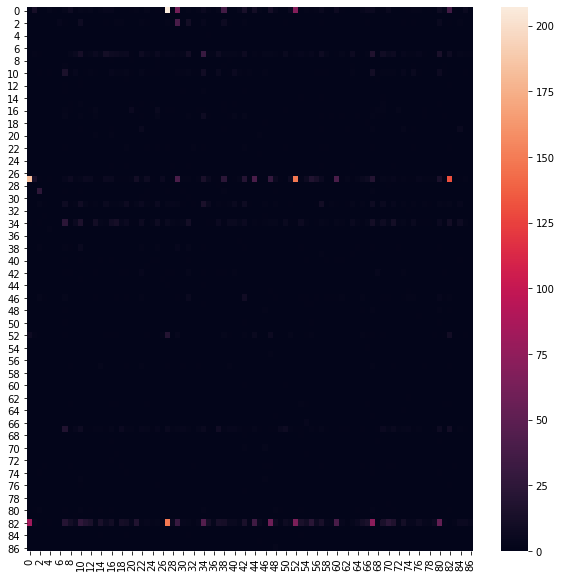

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
res = mod.predict(X_test)
y_pred = np.argmax(res, 1)
cm = confusion_matrix(y_pred, y_test)
np.fill_diagonal(cm, 0)
plt.figure(figsize=(10,10))
sns.heatmap(cm)

c, t = 0,0
for p, a in zip(y_pred, y_test):
    if p==a: 
        c +=1 
    t += 1
print(c /t)

In [36]:
pd.DataFrame(pd.Series(y_test, name="labels")).groupby("labels").size()

labels
0     815
1      33
2     426
3       7
4       9
     ... 
82    493
83     13
84     44
85     20
86     10
Length: 87, dtype: int64

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.3s finished


<AxesSubplot:>

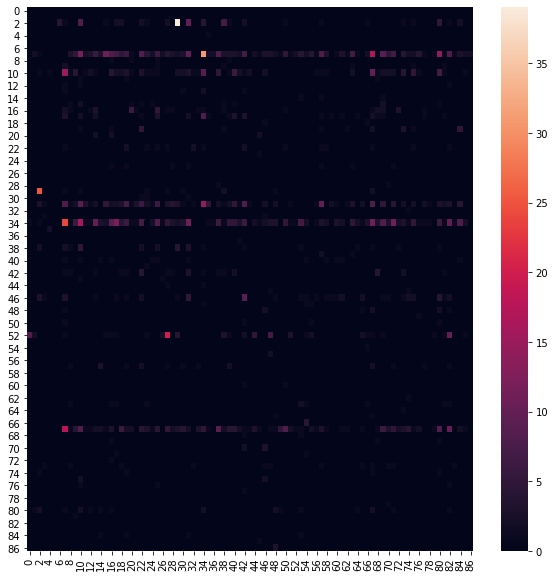

In [37]:
res = mod.predict(X_test)
y_pred = np.argmax(res, 1)
cm = confusion_matrix(y_pred, y_test)
cm[0] = 0
cm[27] = 0
cm[82] = 0
np.fill_diagonal(cm, 0)
plt.figure(figsize=(10,10))
sns.heatmap(cm)